# LOADING THE DATASETS

In [1]:
import pandas as pd
import numpy as np

In [2]:
movies=pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings=pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
links=pd.read_csv("links.csv")
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
tags=pd.read_csv("tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


# Visualising the data

In [6]:
ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(10)

movieId
53355     5.0
96608     5.0
33138     5.0
128087    5.0
3851      5.0
160644    5.0
126921    5.0
3939      5.0
3940      5.0
3941      5.0
Name: rating, dtype: float64

In [7]:
ratings.groupby('movieId')['rating'].count().sort_values(ascending=False)

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
57502       1
57522       1
57526       1
4032        1
193609      1
Name: rating, Length: 9724, dtype: int64

In [8]:
ratings_count=pd.DataFrame(ratings.groupby('movieId').agg({'rating':np.mean}))
ratings_count.reset_index()
ratings_count.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [9]:
ratings_count['No. of Ratings']=pd.DataFrame(ratings.groupby('movieId')['rating'].count())
ratings_count.head()

,rating,No. of Ratings
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


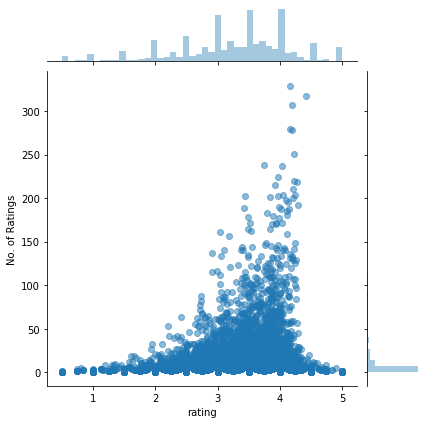

In [39]:
import seaborn as sns
sns.jointplot(x='rating',y='No. of Ratings',data=ratings_count,alpha=0.5)

#### From the graph we can tell that where ever the points are dense, that is the most number of ratings that has been given by the users. 

# 1.	Creating recommender system using only ratings dataset

In [11]:
movie_rating_count=(ratings.groupby('movieId')['rating'].count().reset_index().rename(columns={'rating':'TotalCount'})[['movieId','TotalCount']])
movie_rating_count.head()

,movieId,TotalCount
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


In [12]:
#movie_rating_count.sort_values('TotalCount',ascending=False)

In [13]:
ratings_with_count=ratings.merge(movie_rating_count,left_on='movieId',right_on='movieId',how='left')
ratings_with_count.head(10)

,userId,movieId,rating,timestamp,TotalCount
0,1,1,4.0,964982703,215
1,1,3,4.0,964981247,52
2,1,6,4.0,964982224,102
3,1,47,5.0,964983815,203
4,1,50,5.0,964982931,204
5,1,70,3.0,964982400,55
6,1,101,5.0,964980868,23
7,1,110,4.0,964982176,237
8,1,151,5.0,964984041,44
9,1,157,5.0,964984100,11


In [14]:
popularity_threshold=50
ratings_popular_movies=ratings_with_count.query('TotalCount >= @popularity_threshold')
ratings_popular_movies.head(10)

,userId,movieId,rating,timestamp,TotalCount
0,1,1,4.0,964982703,215
1,1,3,4.0,964981247,52
2,1,6,4.0,964982224,102
3,1,47,5.0,964983815,203
4,1,50,5.0,964982931,204
5,1,70,3.0,964982400,55
7,1,110,4.0,964982176,237
10,1,163,5.0,964983650,66
12,1,223,3.0,964980985,104
13,1,231,5.0,964981179,133


#### Keeping only those movies which has been rated by more than 50 users

In [15]:
ratings_matrix=(ratings_popular_movies.pivot(index='movieId',columns='userId',values='rating')).fillna(0)
ratings_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
7,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0


In [16]:
from scipy.sparse import csr_matrix
ratings_csr=csr_matrix(ratings_matrix.values)
ratings_csr

<450x606 sparse matrix of type '<class 'numpy.float64'>'
	with 41360 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.neighbors import NearestNeighbors
knn=NearestNeighbors(metric='cosine',algorithm='brute')
knn.fit(ratings_csr)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [18]:
query_index=np.random.choice(ratings_matrix.shape[0])
print(query_index)
distances,indices=knn.kneighbors(ratings_matrix.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

226


In [19]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print('Recommendation for {0}:\n'.format(ratings_matrix.index[query_index]))
    else:
        print('{0}: {1} with distances of {2}:'.format(i,ratings_matrix.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendation for 2054:

1: 2115 with distances of 0.438347144478365:
2: 2174 with distances of 0.44484680371203733:
3: 2797 with distances of 0.4459895577714479:
4: 1097 with distances of 0.4801168861666184:
5: 1580 with distances of 0.4873612199053564:


# 2.  Display predicted rating for a particular userID and MovieID combinations (both taken as keyboard input)

In [20]:
from surprise import KNNWithMeans, Dataset, accuracy, Reader, SVD
from surprise.model_selection import train_test_split

In [21]:
ratings_new=ratings.copy()

In [22]:
ratings_new.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [23]:
ratings_new=ratings_new.drop('timestamp',axis=1)

In [24]:
reader=Reader(rating_scale=(1,5))
data=Dataset.load_from_df(ratings_new,reader)

In [25]:
[trainset,testset]=train_test_split(data,test_size=0.2,shuffle=True)

In [26]:
recom=KNNWithMeans(k=50,sim_options={'name':'cosine','user_based':True})
recom.fit(data.build_full_trainset())
test_pred=recom.test(testset)
RMSE=accuracy.rmse(test_pred)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7752


In [27]:
test_pred

[Prediction(uid=460, iid=32596, r_ui=3.5, est=3.7439305123554902, details={'actual_k': 7, 'was_impossible': False}),
 Prediction(uid=288, iid=2133, r_ui=3.0, est=3.121706208581007, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=260, iid=904, r_ui=4.0, est=4.32519806787968, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid=599, iid=569, r_ui=1.0, est=1.9323171813377633, details={'actual_k': 6, 'was_impossible': False}),
 Prediction(uid=381, iid=45517, r_ui=4.0, est=3.376175883370552, details={'actual_k': 41, 'was_impossible': False}),
 Prediction(uid=387, iid=141, r_ui=2.0, est=3.1739694124213313, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid=89, iid=128944, r_ui=3.5, est=3.5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=387, iid=8807, r_ui=3.5, est=3.337346151970059, details={'actual_k': 34, 'was_impossible': False}),
 Prediction(uid=599, iid=85881, r_ui=3.5, est=3.1889645716038473, details={'actual_k': 

In [28]:
print('Please enter User_Id')
ui=int(input())
print('Please enter Movie_Id')
iid=int(input())
pre=recom.predict(ui,iid)
print('The rating value for item', iid, 'by user',ui, 'is: ',pre[3])

Please enter User_Id
4
Please enter Movie_Id
8
The rating value for item 8 by user 4 is:  2.931195298234755


# 3. Recommend a user to watch top 10 movies, which has not watched yet (as per his rating predictions). Take userID as a keyboard input. Fix the threshold rating as 2.5

#### movies that selected user id has watched and has rated the movie more than 4

In [29]:
print('Please select any User_Id')
uid=int(input())
df_user = ratings_new[(ratings_new['userId'] == uid) & (ratings_new['rating'] > 4)]
df_user = df_user.set_index('movieId')
df_user = df_user.join(movies)['title']
df_user = pd.DataFrame(df_user)
#df_user.reset_index()
df_user.head()

Please select any User_Id
3


,title
movieId,
849,Drunks (1995)
1587,Snake Eyes (1998)
2851,Interiors (1978)
3024,At Close Range (1986)
3703,John Q (2002)


In [30]:
movies_not_considered=list(df_user.index)
movies_not_considered

[849,
 1587,
 2851,
 3024,
 3703,
 4518,
 5181,
 5746,
 5764,
 5919,
 6835,
 7899,
 7991,
 26409,
 70946]

In [31]:
user=movies.copy()
user.reset_index()
user= user[~user['movieId'].isin(movies_not_considered)]
pre = list(user['movieId'].apply(lambda x: recom.predict(uid, x)))

In [32]:
pre

[Prediction(uid=3, iid=1, r_ui=None, est=2.7088621793661365, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid=3, iid=2, r_ui=None, est=2.417923123800971, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid=3, iid=3, r_ui=None, est=2.1996787344314708, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=3, iid=4, r_ui=None, est=1.5244104332995052, details={'actual_k': 6, 'was_impossible': False}),
 Prediction(uid=3, iid=5, r_ui=None, est=1.9441406541052129, details={'actual_k': 31, 'was_impossible': False}),
 Prediction(uid=3, iid=6, r_ui=None, est=2.933627125258578, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid=3, iid=7, r_ui=None, est=2.0773016413034773, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid=3, iid=8, r_ui=None, est=1.612890347476263, details={'actual_k': 7, 'was_impossible': False}),
 Prediction(uid=3, iid=9, r_ui=None, est=2.1243353978485198, details={'actual_k': 8, 'was_impossible'

In [33]:
pred_rating=[]
for Prediction in pre:
    pred_rating.append(Prediction.est)
pred_rating

[2.7088621793661365,
 2.417923123800971,
 2.1996787344314708,
 1.5244104332995052,
 1.9441406541052129,
 2.933627125258578,
 2.0773016413034773,
 1.612890347476263,
 2.1243353978485198,
 2.280805380982712,
 2.5599296248502617,
 1.5705056102091133,
 2.2886731002405636,
 2.498496041797175,
 2.0798987957513995,
 2.7316242424326287,
 2.6581343491084497,
 2.6657863365781362,
 1.5963596302679932,
 1.6589058809963007,
 2.376666926323282,
 2.285905335771611,
 1.932192827171452,
 2.095777094208503,
 2.335465422312686,
 2.4548198988606353,
 2.1762384374481174,
 3.0263988758544347,
 2.8354735159415756,
 1.570095757277176,
 2.1888510475073732,
 2.7202418255761063,
 2.566986111813391,
 2.629811522978319,
 1.463392973307609,
 2.3371738914101057,
 2.4358974358974357,
 2.716922397743377,
 2.038246573729009,
 2.0410276554035423,
 1.6243969777346927,
 2.286595899680293,
 1.845415466792856,
 2.728667160588647,
 2.105105356588404,
 1.617038875103391,
 3.013614020386978,
 2.2382207988527805,
 3.81149428689

In [34]:
user['Estimate_Score']=pred_rating
user= user.sort_values('Estimate_Score', ascending=False)
user.head(10)

,movieId,title,genres,Estimate_Score
2665,3567,Bossa Nova (2000),Comedy|Drama|Romance,4.795897
3908,5490,The Big Bus (1976),Action|Comedy,4.588526
8839,132333,Seve (2014),Documentary|Drama,4.588526
5435,25947,Unfaithfully Yours (1948),Comedy,4.444416
2523,3379,On the Beach (1959),Drama,4.293847
6999,67618,Strictly Sexual (2008),Comedy|Drama|Romance,4.202167
2329,3086,Babes in Toyland (1934),Children|Comedy|Fantasy|Musical,4.134328
9365,162344,Tom Segura: Mostly Stories (2016),Comedy,4.096114
8775,128914,Tom Segura: Completely Normal (2014),Comedy,4.096114
9227,152105,Dad's Army (1971),Comedy,4.088526


# 4.	Display the MovieID, IMDB ID, Average User Rating (excluding predictions), genres and tag of all the movies found in Step 3 as a data frame.

In [35]:
user=user.merge(links)
user.head(10)

,movieId,title,genres,Estimate_Score,imdbId,tmdbId
0,3567,Bossa Nova (2000),Comedy|Drama|Romance,4.795897,180837,19600.0
1,5490,The Big Bus (1976),Action|Comedy,4.588526,74205,19133.0
2,132333,Seve (2014),Documentary|Drama,4.588526,3149640,278990.0
3,25947,Unfaithfully Yours (1948),Comedy,4.444416,40919,33115.0
4,3379,On the Beach (1959),Drama,4.293847,53137,35412.0
5,67618,Strictly Sexual (2008),Comedy|Drama|Romance,4.202167,494277,13808.0
6,3086,Babes in Toyland (1934),Children|Comedy|Fantasy|Musical,4.134328,24852,25898.0
7,162344,Tom Segura: Mostly Stories (2016),Comedy,4.096114,4970632,376482.0
8,128914,Tom Segura: Completely Normal (2014),Comedy,4.096114,3500822,259395.0
9,152105,Dad's Army (1971),Comedy,4.088526,66963,20051.0


In [36]:
ty=[]
gh=[]
for j in list(ratings['movieId'].unique()):
    t=' '
    for i in tags[tags['movieId']==j]['tag']:
        if i != t:
            t+=i+'/' 
    ty.append(t)
    gh.append(j)

In [37]:
tags_new=pd.DataFrame()
tags_new['movieId']=gh
tags_new['Tags']=ty
tags_new.head()

,movieId,Tags
0,1,pixar/pixar/fun/
1,3,moldy/old/
2,6,
3,47,mystery/twist ending/serial killer/
4,50,mindfuck/suspense/thriller/tricky/twist endin...


In [38]:
user=user.merge(tags_new)
user.head(10)

,movieId,title,genres,Estimate_Score,imdbId,tmdbId,Tags
0,3567,Bossa Nova (2000),Comedy|Drama|Romance,4.795897,180837,19600.0,
1,5490,The Big Bus (1976),Action|Comedy,4.588526,74205,19133.0,
2,132333,Seve (2014),Documentary|Drama,4.588526,3149640,278990.0,
3,25947,Unfaithfully Yours (1948),Comedy,4.444416,40919,33115.0,
4,3379,On the Beach (1959),Drama,4.293847,53137,35412.0,
5,67618,Strictly Sexual (2008),Comedy|Drama|Romance,4.202167,494277,13808.0,
6,3086,Babes in Toyland (1934),Children|Comedy|Fantasy|Musical,4.134328,24852,25898.0,
7,162344,Tom Segura: Mostly Stories (2016),Comedy,4.096114,4970632,376482.0,
8,128914,Tom Segura: Completely Normal (2014),Comedy,4.096114,3500822,259395.0,
9,152105,Dad's Army (1971),Comedy,4.088526,66963,20051.0,
